In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

In [2]:
df=pd.read_csv('./data/binned_SFHs/binned_SFHs-11levels-JWST_z_0.5-1.0.txt',sep='\t')
df

,id_L19,z,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,...,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,bins_7,bins_8,bins_9,bins_10
0,1.0,0.999855,0.939681,0.765723,1.040326,0.653183,0.681013,0.876748,1.087066,1.334943,...,30.0,53.0,94.0,167.0,296.0,525.0,931.0,1650.0,2925.0,5185.0
1,2.0,0.999877,0.620013,0.681315,0.847025,0.771318,0.604645,0.606996,1.038095,1.255895,...,30.0,53.0,93.0,164.0,289.0,508.0,895.0,1577.0,2777.0,4890.0
2,3.0,0.999962,0.179263,0.353490,0.193751,0.228442,0.215671,0.247727,0.232897,0.361108,...,30.0,52.0,92.0,160.0,280.0,489.0,856.0,1495.0,2614.0,4569.0
3,4.0,0.999992,0.957090,0.891500,0.686737,0.756981,1.007660,1.165234,1.343500,1.957630,...,30.0,53.0,94.0,165.0,292.0,516.0,912.0,1611.0,2847.0,5029.0
4,5.0,0.999904,0.085287,0.109160,0.125521,0.104615,0.100381,0.158273,0.192622,0.174321,...,30.0,53.0,93.0,165.0,290.0,512.0,903.0,1594.0,2811.0,4958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91365,96083.0,0.500094,1.458885,1.263207,1.180912,0.986489,1.385861,1.535868,1.734626,1.248427,...,30.0,56.0,103.0,190.0,352.0,652.0,1206.0,2233.0,4133.0,7650.0
91366,96084.0,0.500007,2.232033,1.801724,2.332847,2.174740,2.182127,2.159274,2.861361,4.188978,...,30.0,55.0,103.0,190.0,351.0,650.0,1202.0,2223.0,4113.0,7608.0
91367,96085.0,0.500002,0.173875,0.000000,0.160250,0.175548,0.256810,0.209051,0.209495,0.246817,...,30.0,55.0,101.0,185.0,338.0,620.0,1136.0,2081.0,3813.0,6987.0
91368,96087.0,0.500022,0.595233,0.311524,0.606744,0.398483,0.594600,0.652902,0.571577,0.659411,...,30.0,54.0,99.0,180.0,326.0,592.0,1074.0,1950.0,3541.0,6429.0


In [3]:
levels=df.columns[2:12]
SFH_lev=df[levels].values

Euclidean k-means
9.578 --> 6.348 --> 6.300 --> 6.286 --> 6.280 --> 6.277 --> 6.273 --> 6.267 --> 6.257 --> 6.241 --> 6.217 --> 6.185 --> 6.150 --> 6.114 --> 6.084 --> 6.059 --> 6.041 --> 6.028 --> 6.018 --> 6.011 --> 6.006 --> 6.003 --> 6.000 --> 5.998 --> 5.997 --> 5.996 --> 5.995 --> 5.994 --> 5.994 --> 5.994 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 5.993 --> 


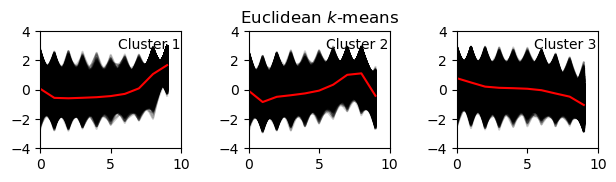

In [4]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = SFH_lev
#X_train = X_train[y_train < 4]  # Keep first 3 classes
#numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")


plt.tight_layout()
plt.show()

In [5]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [6]:
df['id_L19']

0            1.0
1            2.0
2            3.0
3            4.0
4            5.0
          ...   
91365    96083.0
91366    96084.0
91367    96085.0
91368    96087.0
91369    96088.0
Name: id_L19, Length: 91370, dtype: float64

In [7]:
df_cluster = pd.DataFrame()

In [8]:
df_cluster['ID'] = df['id_L19'].astype(int)
df_cluster['cluster'] = y_pred

df_cluster.head()

,ID,cluster
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [9]:
df_cluster.head()

,ID,cluster
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [102]:
df_cluster.to_csv('df_cluster_euclidean_3_lev11.txt')

In [10]:
data=Table.read('data/Horizon_AGN-COSMOS_like/HorizonAGN_COSMOS-Web_v2.0_witherr.fits')
df_photometry=data.to_pandas()
df_photometry

,ID,HSTF814W_FLUX_noerr,HSTF814W_FLUX,HSTF814W_FLUXERR,HSTF814W_MAG_noerr,HSTF814W_MAG,HSTF814W_MAGERR,F444W_FLUX_noerr,F444W_FLUX,F444W_FLUXERR,...,NUV_FLUXERR,NUV_MAG_noerr,NUV_MAG,NUV_MAGERR,FUV_FLUX_noerr,FUV_FLUX,FUV_FLUXERR,FUV_MAG_noerr,FUV_MAG,FUV_MAGERR
0,1,0.629078,0.636226,0.013549,24.403238,24.390972,0.023128,4.343880,4.334220,0.021323,...,0.035126,26.077406,25.665033,0.193853,0.000987,-0.027040,0.052559,31.414064,NaN,2.110900
1,2,0.449977,0.449426,0.013963,24.767025,24.768354,0.033739,1.970548,1.968799,0.014468,...,0.046850,26.453901,27.652271,1.612301,0.000275,-0.011007,0.055536,32.800396,NaN,5.479448
2,3,0.200225,0.205834,0.010640,25.646204,25.616209,0.056140,0.631026,0.631795,0.008867,...,0.045073,26.134323,26.334387,0.460792,0.003122,0.040857,0.034153,30.164066,27.371839,0.907811
3,4,0.726060,0.725394,0.012814,24.247568,24.248565,0.019184,4.155356,4.153001,0.020674,...,0.056593,25.609264,25.830515,0.363749,0.003010,-0.028802,0.039766,30.203663,NaN,1.499414
4,5,0.091547,0.102014,0.008302,26.495895,26.378351,0.088384,0.513111,0.515886,0.007835,...,0.066072,27.993656,NaN,0.931016,0.000077,0.086211,0.051874,34.185699,26.561093,0.653457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789349,789350,0.115913,0.120232,0.008537,26.239672,26.199953,0.077113,0.204896,0.205128,0.006861,...,0.043726,29.484516,NaN,0.971390,NaN,NaN,NaN,NaN,NaN,NaN
789350,789351,0.269554,0.270458,0.009380,25.323387,25.319750,0.037665,0.443495,0.444702,0.007025,...,0.035205,28.437611,NaN,7.831625,NaN,NaN,NaN,NaN,NaN,NaN
789351,789352,0.102258,0.095681,0.013421,26.375759,26.447939,0.152334,0.273410,0.272398,0.006010,...,0.059423,32.652153,26.745141,0.886833,NaN,NaN,NaN,NaN,NaN,NaN
789352,789353,0.166069,0.159498,0.008356,25.849281,25.893111,0.056897,0.196867,0.193210,0.005245,...,0.042043,28.736477,27.291620,1.037950,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pd.set_option('display.max_columns', None)

df_photometry = df_photometry.merge(df_cluster, on= 'ID')
df_photometry

,ID,HSTF814W_FLUX_noerr,HSTF814W_FLUX,HSTF814W_FLUXERR,HSTF814W_MAG_noerr,HSTF814W_MAG,HSTF814W_MAGERR,F444W_FLUX_noerr,F444W_FLUX,F444W_FLUXERR,F444W_MAG_noerr,F444W_MAG,F444W_MAGERR,F115W_FLUX_noerr,F115W_FLUX,F115W_FLUXERR,F115W_MAG_noerr,F115W_MAG,F115W_MAGERR,F150W_FLUX_noerr,F150W_FLUX,F150W_FLUXERR,F150W_MAG_noerr,F150W_MAG,F150W_MAGERR,F277W_FLUX_noerr,F277W_FLUX,F277W_FLUXERR,F277W_MAG_noerr,F277W_MAG,F277W_MAGERR,F770W_FLUX_noerr,F770W_FLUX,F770W_FLUXERR,F770W_MAG_noerr,F770W_MAG,F770W_MAGERR,u_FLUX_noerr,u_FLUX,u_FLUXERR,u_MAG_noerr,u_MAG,u_MAGERR,gHSC_FLUX_noerr,gHSC_FLUX,gHSC_FLUXERR,gHSC_MAG_noerr,gHSC_MAG,gHSC_MAGERR,rHSC_FLUX_noerr,rHSC_FLUX,rHSC_FLUXERR,rHSC_MAG_noerr,rHSC_MAG,rHSC_MAGERR,iHSC_FLUX_noerr,iHSC_FLUX,iHSC_FLUXERR,iHSC_MAG_noerr,iHSC_MAG,iHSC_MAGERR,zHSC_FLUX_noerr,zHSC_FLUX,zHSC_FLUXERR,zHSC_MAG_noerr,zHSC_MAG,zHSC_MAGERR,yHSC_FLUX_noerr,yHSC_FLUX,yHSC_FLUXERR,yHSC_MAG_noerr,yHSC_MAG,yHSC_MAGERR,Y_FLUX_noerr,Y_FLUX,Y_FLUXERR,Y_MAG_noerr,Y_MAG,Y_MAGERR,Ks_FLUX_noerr,Ks_FLUX,Ks_FLUXERR,Ks_MAG_noerr,Ks_MAG,Ks_MAGERR,H_FLUX_noerr,H_FLUX,H_FLUXERR,H_MAG_noerr,H_MAG,H_MAGERR,J_FLUX_noerr,J_FLUX,J_FLUXERR,J_MAG_noerr,J_MAG,J_MAGERR,IB427_FLUX_noerr,IB427_FLUX,IB427_FLUXERR,IB427_MAG_noerr,IB427_MAG,IB427_MAGERR,IB467_FLUX_noerr,IB467_FLUX,IB467_FLUXERR,IB467_MAG_noerr,IB467_MAG,IB467_MAGERR,IB484_FLUX_noerr,IB484_FLUX,IB484_FLUXERR,IB484_MAG_noerr,IB484_MAG,IB484_MAGERR,IB505_FLUX_noerr,IB505_FLUX,IB505_FLUXERR,IB505_MAG_noerr,IB505_MAG,IB505_MAGERR,IB527_FLUX_noerr,IB527_FLUX,IB527_FLUXERR,IB527_MAG_noerr,IB527_MAG,IB527_MAGERR,IB574_FLUX_noerr,IB574_FLUX,IB574_FLUXERR,IB574_MAG_noerr,IB574_MAG,IB574_MAGERR,IB624_FLUX_noerr,IB624_FLUX,IB624_FLUXERR,IB624_MAG_noerr,IB624_MAG,IB624_MAGERR,IB679_FLUX_noerr,IB679_FLUX,IB679_FLUXERR,IB679_MAG_noerr,IB679_MAG,IB679_MAGERR,IB709_FLUX_noerr,IB709_FLUX,IB709_FLUXERR,IB709_MAG_noerr,IB709_MAG,IB709_MAGERR,IB738_FLUX_noerr,IB738_FLUX,IB738_FLUXERR,IB738_MAG_noerr,IB738_MAG,IB738_MAGERR,IB767_FLUX_noerr,IB767_FLUX,IB767_FLUXERR,IB767_MAG_noerr,IB767_MAG,IB767_MAGERR,IB827_FLUX_noerr,IB827_FLUX,IB827_FLUXERR,IB827_MAG_noerr,IB827_MAG,IB827_MAGERR,NB711_FLUX_noerr,NB711_FLUX,NB711_FLUXERR,NB711_MAG_noerr,NB711_MAG,NB711_MAGERR,NB816_FLUX_noerr,NB816_FLUX,NB816_FLUXERR,NB816_MAG_noerr,NB816_MAG,NB816_MAGERR,B_FLUX_noerr,B_FLUX,B_FLUXERR,B_MAG_noerr,B_MAG,B_MAGERR,V_FLUX_noerr,V_FLUX,V_FLUXERR,V_MAG_noerr,V_MAG,V_MAGERR,r_FLUX_noerr,r_FLUX,r_FLUXERR,r_MAG_noerr,r_MAG,r_MAGERR,ip_FLUX_noerr,ip_FLUX,ip_FLUXERR,ip_MAG_noerr,ip_MAG,ip_MAGERR,zpp_FLUX_noerr,zpp_FLUX,zpp_FLUXERR,zpp_MAG_noerr,zpp_MAG,zpp_MAGERR,ch1_FLUX_noerr,ch1_FLUX,ch1_FLUXERR,ch1_MAG_noerr,ch1_MAG,ch1_MAGERR,ch2_FLUX_noerr,ch2_FLUX,ch2_FLUXERR,ch2_MAG_noerr,ch2_MAG,ch2_MAGERR,NUV_FLUX_noerr,NUV_FLUX,NUV_FLUXERR,NUV_MAG_noerr,NUV_MAG,NUV_MAGERR,FUV_FLUX_noerr,FUV_FLUX,FUV_FLUXERR,FUV_MAG_noerr,FUV_MAG,FUV_MAGERR,cluster
0,1,0.629078,0.636226,0.013549,24.403238,24.390972,0.023128,4.343880,4.334220,0.021323,22.305305,22.307723,0.005343,2.434124,2.427549,0.016763,22.934143,22.937080,0.007499,3.259036,3.257389,0.019149,22.617277,22.617826,0.006384,5.136729,5.135544,0.022891,22.123283,22.123534,0.004841,1.991247,2.057662,0.121936,23.152187,23.116565,0.064356,0.284884,0.286727,0.013853,25.263329,25.256330,0.052468,0.314802,0.320382,0.012715,25.154905,25.135828,0.043099,0.498854,0.500087,0.011542,24.655066,24.652387,0.025065,0.962943,0.960387,0.013483,23.940998,23.943884,0.015247,1.650744,1.640276,0.027827,23.355801,23.362707,0.018424,1.961151,1.948152,0.030966,23.168722,23.175943,0.017262,2.029479,1.964291,0.064325,23.131538,23.166985,0.035563,4.630707,4.498899,0.138177,22.235882,22.267234,0.033355,3.615213,3.582190,0.144569,22.504665,22.514629,0.043829,2.695403,2.662646,0.105893,22.823441,22.836716,0.043190,0.285221,0.254946,0.020746,25.262047,25.383880,0.088370,0.284288,0.196832,0.076527,25.265604,25.664760,0.422231,0.303421,0.312712,0.030961,25.194885,25.162140,0.107524,0.324252,0.257366,0.059349,25.122793,

In [12]:
print(*df_photometry.columns)

ID HSTF814W_FLUX_noerr HSTF814W_FLUX HSTF814W_FLUXERR HSTF814W_MAG_noerr HSTF814W_MAG HSTF814W_MAGERR F444W_FLUX_noerr F444W_FLUX F444W_FLUXERR F444W_MAG_noerr F444W_MAG F444W_MAGERR F115W_FLUX_noerr F115W_FLUX F115W_FLUXERR F115W_MAG_noerr F115W_MAG F115W_MAGERR F150W_FLUX_noerr F150W_FLUX F150W_FLUXERR F150W_MAG_noerr F150W_MAG F150W_MAGERR F277W_FLUX_noerr F277W_FLUX F277W_FLUXERR F277W_MAG_noerr F277W_MAG F277W_MAGERR F770W_FLUX_noerr F770W_FLUX F770W_FLUXERR F770W_MAG_noerr F770W_MAG F770W_MAGERR u_FLUX_noerr u_FLUX u_FLUXERR u_MAG_noerr u_MAG u_MAGERR gHSC_FLUX_noerr gHSC_FLUX gHSC_FLUXERR gHSC_MAG_noerr gHSC_MAG gHSC_MAGERR rHSC_FLUX_noerr rHSC_FLUX rHSC_FLUXERR rHSC_MAG_noerr rHSC_MAG rHSC_MAGERR iHSC_FLUX_noerr iHSC_FLUX iHSC_FLUXERR iHSC_MAG_noerr iHSC_MAG iHSC_MAGERR zHSC_FLUX_noerr zHSC_FLUX zHSC_FLUXERR zHSC_MAG_noerr zHSC_MAG zHSC_MAGERR yHSC_FLUX_noerr yHSC_FLUX yHSC_FLUXERR yHSC_MAG_noerr yHSC_MAG yHSC_MAGERR Y_FLUX_noerr Y_FLUX Y_FLUXERR Y_MAG_noerr Y_MAG Y_MAGERR Ks_F

In [13]:
df_magnitude = df_photometry[['u_MAG', 'gHSC_MAG', 'rHSC_MAG', 'iHSC_MAG', 'zHSC_MAG', 'cluster']]
df_magnitude


,u_MAG,gHSC_MAG,rHSC_MAG,iHSC_MAG,zHSC_MAG,cluster
0,25.256330,25.135828,24.652387,23.943884,23.362707,0
1,25.608875,25.433839,24.989253,24.285662,23.761995,1
2,25.836970,25.975482,25.925041,25.193421,24.759748,1
3,24.996950,24.935638,24.477681,23.782817,23.229884,1
4,27.699570,27.261439,26.956020,26.073994,25.487756,0
...,...,...,...,...,...,...
91365,22.959348,22.636558,21.765726,21.343759,21.151383,1
91366,22.897408,22.263371,21.161875,20.594155,20.332555,1
91367,25.220538,24.650405,23.642537,23.118839,22.902444,0
91368,24.205675,23.636393,22.560628,22.037424,21.806017,0


**Magnitudes**

In [15]:
df_magnitude_noerr = df_photometry[['u_MAG_noerr', 'gHSC_MAG_noerr', 'rHSC_MAG_noerr', 'iHSC_MAG_noerr', 'zHSC_MAG_noerr', 'cluster']]
df_magnitude_noerr

,u_MAG_noerr,gHSC_MAG_noerr,rHSC_MAG_noerr,iHSC_MAG_noerr,zHSC_MAG_noerr,cluster
0,25.263329,25.154905,24.655066,23.940998,23.355801,0
1,25.552471,25.459475,24.998421,24.279184,23.759457,1
2,25.911186,25.935917,25.780342,25.227812,24.785313,1
3,25.002691,24.921156,24.494930,23.786884,23.223497,1
4,27.342621,27.245632,26.783840,25.999836,25.416460,0
...,...,...,...,...,...,...
91365,22.970684,22.632723,21.765442,21.343445,21.152182,1
91366,22.896055,22.265055,21.162010,20.594234,20.332863,1
91367,25.131298,24.661905,23.633530,23.124691,22.899670,0
91368,24.205894,23.629539,22.556494,22.036036,21.806715,0


In [16]:
#get the mean of each band
u_MAG_mean = df_magnitude.loc[:, 'u_MAG'].mean()
g_MAG_mean = df_magnitude.loc[:, 'gHSC_MAG'].mean()
r_MAG_mean = df_magnitude.loc[:, 'rHSC_MAG'].mean()
i_MAG_mean = df_magnitude.loc[:, 'iHSC_MAG'].mean()
z_MAG_mean = df_magnitude.loc[:, 'zHSC_MAG'].mean()
print(u_MAG_mean,g_MAG_mean, r_MAG_mean, i_MAG_mean, z_MAG_mean)

25.430429787791546 25.126303420810267 24.428529412427118 23.610042310773682 23.274081265255848


In [17]:
data=Table.read('data/Horizon_AGN-COSMOS_like/HorizonAGN_LAIGLE-DAVIDZON+2019_COSMOS_v1.6.fits')
df_physics=data.to_pandas()
data=Table.read('data/CIGALE/results_0.5-1.0.fits')
df_CIG=data.to_pandas()


redshift_lp=df_physics['ZMED_UP_sedf'].values
mass_lp=df_physics['MMED_sedf'].values
sfr_lp=df_physics['SFRMED_sedf'].values
mass_CIG=df_CIG['bayes.stellar.m_star'].values
sfr_CIG=df_CIG['bayes.sfh.sfr'].values      #

cond_lp=(redshift_lp>0.5)&(redshift_lp<1)

redshift=df_physics['z_true'].values
mass=df_physics['MASSBC03_true'].values
sfr=df_physics['SFR_true'].values

cond=(redshift>0.5)&(redshift<1)
plt.hist(df_photometry['u_MAG'][cond],bins=100)
plt.axvline(np.median(df_photometry['u_MAG'][cond]),c='k')
plt.xlabel(r'(u Mag)$_{\rm AB}$')

plt.xlim(16,26)

plt.show()

filt_var_col=df_photometry['u_MAG'][cond]
err_var_col=df_photometry['u_MAGERR'][cond]

cond_=(err_var_col<1/5)
plt.scatter(filt_var_col,err_var_col,s=0.2)
plt.scatter(filt_var_col[cond_],err_var_col[cond_],s=1,c='r',alpha=1)

cond_=(err_var_col<0.21)&(err_var_col>0.19)

print(np.mean(filt_var_col[cond_]))
plt.axvline(np.mean(filt_var_col[cond_]),c='k')
plt.axhline(0.2,c='k')


plt.xlabel(r'(u)$_{\rm AB}$')
plt.ylabel(r'(u-err)$_{\rm AB}$')

plt.xlim(16,26)
plt.ylim(0,0.5)

IndexError: Boolean index has wrong length: 789354 instead of 91370

**Fluxes**